## Goals & Steps
Goal: analyze how to maximize engagement with a reddit post

Process:
1. Gather data from Reddit.com (Webscrape)
2. Clean the data
  - convert "texts" to be analyzed quantitatively
3. Look for patterns, create charts & graphs
4. Set predictor and target (subreddits and title texts, vs. number of comments)
5. Run classifying models to predict which posts had highest engagement (measured by number of comments on the post)
  - Check the models for ultimate hyperparameters (GridSearch) to ensure ultimate model performance
6. Present findings in executive summary

## Step 1. Data Gathering (Webscraping)

In [1]:
#import webscraping tools
import requests
from bs4 import BeautifulSoup
import urllib

In [2]:
url = "http://www.reddit.com"

In [3]:
from selenium import webdriver
from selenium.webdriver import Chrome
#import tools needed to run the webscraping in seperate Chrome windows, \
#as opposed to directly from Python

In [4]:
driver = webdriver.Chrome(executable_path = './chromedriver 2')
driver.get(url)
#opens a new window

In [5]:
#import sleep to slow down processing
from time import sleep

In [6]:
content = driver.page_source
# print all the HTML from reddit


<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en" class=" js cssanimations csstransforms"><head><title>reddit: the front page of the internet</title><meta name="keywords" content=" reddit, reddit.com, vote, comment, submit " /><meta name="description" content="reddit: the front page of the internet" /><meta name="referrer" content="always" /><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><link type="application/opensearchdescription+xml" rel="search" href="/static/opensearch.xml" /><link rel="canonical" href="https://www.reddit.com/" /><meta name="viewport" content="width=1024" /><link rel="dns-prefetch" href="//out.reddit.com" /><link rel="preconnect" href="//out.reddit.com" /><link rel="apple-touch-icon" sizes="57x57" href="//www.redditstatic.com/desktop2x/img/favicon/apple-icon-57x57.png" /><link rel="apple-touch-icon" sizes="60x60" href="//www.redditstatic.com/desktop2x/img/favicon/apple-icon-60x60.png" /><link rel="apple-touch-

In [7]:
#lxml is one of the parsers of HTML for python
soup = BeautifulSoup(content, 'lxml')
#close the window after the necessary text is scraped
driver.close()

In [10]:
#print out the html code for the thread title to see what it looks like
print soup.find_all('a', {'data-event-action': 'title'})

[<a class="title may-blank " data-event-action="title" href="//pixel.redditmedia.com/click?url=https%3A%2F%2Fengine.a.redditmedia.com%2Fr%3Fe%3DeyJhdiI6MjMyNjA1LCJhdCI6NCwiYnQiOjAsImNtIjo1ODUzNDksImNoIjo3OTg0LCJjayI6e30sImNyIjo0MjA0MTI2LCJkaSI6ImRjYTU2MDk5NDYzOTRiOWE4NjQ3MzBiNWE5ZTAzNjA1IiwiZGoiOjAsImlpIjoiZjQ2YjZhNTU0MGRkNGI4OWI1YTkyYjhiOWZmZWQ5ZTUiLCJkbSI6MywiZmMiOjcwMDEyNTksImZsIjo2OTI1NDQwLCJpcCI6IjI0LjE4NC4xNDAuMTM3IiwibnciOjUxNDYsInBjIjowLjc1LCJkcCI6MC4zNCwiZG4iOjAuMzQsImVjIjowLjc1LCJwciI6ODQ1MzYsInJ0IjoyLCJycyI6NTAwLCJzYSI6IjExIiwic2IiOiJpLTA1NGZjMWZhZWZhNDhjZjBlIiwic3AiOjE1MTAyLCJzdCI6MjQ5NTAsInVrIjoidWJsZGZ1MyIsInRzIjoxNTE3MTkyMjEwMTYwLCJwbiI6ImRpdl9mZWVkIiwidXIiOiJodHRwczovL3d3dy5hbWF6b24uY29tL3N0cmVhbS8_dGFnPXJhMGEwLTIwJmFzY3N1YnRhZz1wdHItRFNTLTEtOS1ZNzhDQW5vaEJVamRld08xJnJlZl89cHRyX0RTU18xXzlfWTc4Q0Fub2hCVWpkZXdPMSJ9%26s%3DXpQ16F22qNrQ8GvnPuyG_W0mA-s&amp;unused=reddit.com&amp;hash=d3878ef469b8057c37fcf8db18906b287669ce2e&amp;id=t3_7rkmae-__REDDIT_AD_SERVER__" rel="" tabinde

In [11]:
#print only the text with the thread title tag
print soup.find('a',{'data-event-action':'title'}).get_text()

Hey Reddit, we've created a special space full of fun, weird and unique items that you probably didn't even know existed on Amazon! Shop our endless finds today!


In [12]:
#print only the text for the "hours posted ago" tag
print soup.find('time',{'class':'live-timestamp'}).get_text()

5 hours ago


In [13]:
#print only the text to see the subreddit thread
print soup.find('a',{'class':'subreddit hover may-blank'}).get_text()

r/CozyPlaces


In [14]:
#print out text version of number of comments 
## this will be our measure of "engagement"
print soup.find('a',{'data-event-action':'comments'}).get_text()

476 comments


## Write functions to extract these items:
- title
- time
- subreddit
- number of comments


## Function to retrieve thread title

In [15]:
def get_title(html):
    #html is NOT the "HTML" that we found, it is the "soup"
    title_list =[]
    for x in html.findAll('p', {'class':'title'})[1:]:
        title_list.append(x.text)
    return title_list

In [16]:
#print all the titles
titles = get_title(soup)
titles
#this is a list, in our df it will be as a dataframe

[u'Rainy days in NYC (i.redd.it)',
 u'A gentleman (i.imgur.com)',
 u'My dad and I are a great reminder that genetics aren\u2019t an exact science (i.imgur.com)',
 u'Death and the DogComic (i.redd.it)',
 u'Everything is better with a combat roll. (v.redd.it)',
 u'When you\u2019re suspended from hogwarts (v.redd.it)',
 u'Dan Bilzerian murdered by DiploBurn (i.redd.it)',
 u'2meirl4meirl (i.imgur.com)',
 u'ENLIGHTENED BOYE (i.redd.it)',
 u'Pizza slid out of the box./r/all (i.redd.it)',
 u'TIL during the first combat usage of the American Sidewinder missile in 1958, a dud hit an enemy plane and became lodged without exploding. The pilot returned to base, allowing Soviet engineers to study it and reverse-engineer a nearly identical missile for their own use. (en.wikipedia.org)',
 u'The light at the end of the wave.picture (i.imgur.com)',
 u'"I\'m prepared to be shot," says one protester as Russia\u2019s youth takes the lead in countrywide protests against Putin. (themoscowtimes.com)',
 u'Gir

## Function to retrieve how long ago title was posted

In [17]:
def get_time(html):
    #html is the "soup"
    time_list =[]
    for x in html.findAll('time',{'class':'live-timestamp'}):
        time_list.append(x.text)
    return time_list

In [18]:
times = get_time(soup)
#print the time posted 
print times

[u'5 hours ago', u'3 hours ago', u'4 hours ago', u'4 hours ago', u'4 hours ago', u'3 hours ago', u'5 hours ago', u'5 hours ago', u'6 hours ago', u'5 hours ago', u'7 hours ago', u'5 hours ago', u'8 hours ago', u'7 hours ago', u'8 hours ago', u'7 hours ago', u'5 hours ago', u'6 hours ago', u'7 hours ago', u'7 hours ago', u'7 hours ago', u'3 hours ago', u'8 hours ago', u'8 hours ago', u'5 hours ago']


## Function to retrieve subreddit

In [19]:
def get_subreddit(html_soup):
    subreddit_list =[]
    for x in html_soup.findAll('a',{'class':'subreddit hover may-blank'}):
        try:
            subreddit_list.append(x.text)
        except:
            subreddit_list.append('ERROR')
    return subreddit_list

In [20]:
subreddits = get_subreddit(soup)
subreddits

[u'r/CozyPlaces',
 u'r/gifs',
 u'r/pics',
 u'r/wholesomememes',
 u'r/nevertellmetheodds',
 u'r/funny',
 u'r/MurderedByWords',
 u'r/2meirl4meirl',
 u'r/rarepuppers',
 u'r/Wellthatsucks',
 u'r/todayilearned',
 u'r/woahdude',
 u'r/worldnews',
 u'r/pics',
 u'r/aww',
 u'r/funny',
 u'r/Showerthoughts',
 u'r/news',
 u'r/mildlyinfuriating',
 u'r/technology',
 u'r/MEOW_IRL',
 u'r/IAmA',
 u'r/pics',
 u'r/videos',
 u'r/comics']

## Function to retrieve number of comments 
**important to note** this will be how we measure engagement

In [21]:
def get_comments(html_soup):
    comment_list =[]
    #use tag found above to pull out every nmber of comments per post, 25 posts per page
    for x in html_soup.findAll('a',{'data-event-action':'comments'}):
        try:
            comment_list.append(x.text)
        except:
            comment_list.append('ERROR')
    return comment_list

In [22]:
number_comments = get_comments(soup)
number_comments

[u'476 comments',
 u'714 comments',
 u'2129 comments',
 u'564 comments',
 u'260 comments',
 u'198 comments',
 u'1161 comments',
 u'259 comments',
 u'78 comments',
 u'476 comments',
 u'697 comments',
 u'35 comments',
 u'2461 comments',
 u'320 comments',
 u'186 comments',
 u'323 comments',
 u'161 comments',
 u'345 comments',
 u'153 comments',
 u'401 comments',
 u'67 comments',
 u'401 comments',
 u'1248 comments',
 u'2216 comments',
 u'28 comments']

### Check the lengths of the results of each function (make sure each function is pulling the same amount of information from the page)

In [23]:
print "Titles:",len(titles)
print "Hours Posted Ago:", len(times)
print "Subreddit: ", len(subreddits)
print "Number of Comments: ", len(number_comments)

Titles: 25
Hours Posted Ago: 25
Subreddit:  25
Number of Comments:  25


#### they match! Moving on to pulling them into a dataframe

In [24]:
import pandas as pd

In [25]:
#create a dictionary with the title, then information to prepare a dataframe
dic = {'titles':titles, 'posted':times, 'subreddit':subreddits, 'comments':number_comments}
df = pd.DataFrame(dic)

In [26]:
#print out dataframe of information pulled from the first page:
df

,comments,posted,subreddit,titles
0,476 comments,5 hours ago,r/CozyPlaces,Rainy days in NYC (i.redd.it)
1,714 comments,3 hours ago,r/gifs,A gentleman (i.imgur.com)
2,2129 comments,4 hours ago,r/pics,My dad and I are a great reminder that genetic...
3,564 comments,4 hours ago,r/wholesomememes,Death and the DogComic (i.redd.it)
4,260 comments,4 hours ago,r/nevertellmetheodds,Everything is better with a combat roll. (v.re...
5,198 comments,3 hours ago,r/funny,When you’re suspended from hogwarts (v.redd.it)
6,1161 comments,5 hours ago,r/MurderedByWords,Dan Bilzerian murdered by DiploBurn (i.redd.it)
7,259 comments,5 hours ago,r/2meirl4meirl,2meirl4meirl (i.imgur.com)
8,78 comments,6 hours ago,r/rarepuppers,ENLIGHTENED BOYE (i.redd.it)
9,476 comments,5 hours ago,r/Wellthatsucks,Pizza slid out of the box./r/all (i.redd.it)


#### Looks good, now move on to set up functions to pull from **more** than one page

## Combine four functions into one meta-function pulling information from a reddit page

In [27]:
def reddit_df_function(soup):
    title = get_title(soup)
    times = get_time(soup)
    subreddit = get_subreddit(soup)
    comments = get_comments(soup)
    dic = {'titles':title, 'posted':times, 'subreddit':subreddit, 'comments':comments}
    #make sure we are pulling the same information, the df will have equal # of rows
    if len(title) == len(times) == len(subreddit) == len(comments):
        df = pd.DataFrame(dic)
        return df

In [28]:
#check function against data above (should be the same information)
reddit_df_function(soup)

,comments,posted,subreddit,titles
0,476 comments,5 hours ago,r/CozyPlaces,Rainy days in NYC (i.redd.it)
1,714 comments,3 hours ago,r/gifs,A gentleman (i.imgur.com)
2,2129 comments,4 hours ago,r/pics,My dad and I are a great reminder that genetic...
3,564 comments,4 hours ago,r/wholesomememes,Death and the DogComic (i.redd.it)
4,260 comments,4 hours ago,r/nevertellmetheodds,Everything is better with a combat roll. (v.re...
5,198 comments,3 hours ago,r/funny,When you’re suspended from hogwarts (v.redd.it)
6,1161 comments,5 hours ago,r/MurderedByWords,Dan Bilzerian murdered by DiploBurn (i.redd.it)
7,259 comments,5 hours ago,r/2meirl4meirl,2meirl4meirl (i.imgur.com)
8,78 comments,6 hours ago,r/rarepuppers,ENLIGHTENED BOYE (i.redd.it)
9,476 comments,5 hours ago,r/Wellthatsucks,Pizza slid out of the box./r/all (i.redd.it)


# Write function to pass reddit_function through multiple pages
### will have to pull the last id of the page, store it, and run through again

In [30]:
import re
#pull out the id from the html using it's tag as 'thing':'id'
soup.find(id= re.compile('thing'))['id']

'thing_t3_7rkmae'

In [31]:
#pull out just the id (take out "thing_")
soup.find(id= re.compile('thing'))['id'][6:]

't3_7rkmae'

In [32]:
#write function to pull the unique page identifier id at the end of the page
def get_lastID(mysoup):
    return mysoup.find(id= re.compile('thing'))['id'][6:]

In [33]:
#check function
get_lastID(soup)

't3_7rkmae'

## Now combine reddit_function and last_ID function to pull reddit information from multiple pages

In [34]:
#save as dataframe

# 2. Clean/look at the data

In [35]:
#prepare for data analysis and presentation
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
% matplotlib inline

In [36]:
#retrieve dataframe
df= pd.read_csv('./df_excel.csv')
df

,comment,comments,domain,posted,subreddit,times,title,titles
0,321 comments,NaN,amazon.com,NaN,r/sports,2 hours ago,Synced videos of the Eagles fan running into t...,NaN
1,764 comments,NaN,v.redd.it,NaN,r/gifs,3 hours ago,Dad prevents crash.,NaN
2,350 comments,NaN,i.imgur.com,NaN,r/FellowKids,3 hours ago,Legit the best place for your squad to stay wo...,NaN
3,584 comments,NaN,i.imgur.com,NaN,r/DadReflexes,3 hours ago,Dad reflexes prevent crash.,NaN
4,1351 comments,NaN,i.imgur.com,NaN,r/gaming,5 hours ago,My friend playing Mario Odyssey during class,NaN
5,163 comments,NaN,i.redd.it,NaN,r/wholesomebpt,5 hours ago,One of the best feelings ever,NaN
6,487 comments,NaN,i.imgur.com,NaN,r/pics,5 hours ago,So it snowed on the cabbage field...,NaN
7,802 comments,NaN,i.redd.it,NaN,r/ChoosingBeggars,5 hours ago,Quite literally choosing beggar,NaN
8,430 comments,NaN,i.imgur.com,NaN,r/Futurology,5 hours ago,Tesla’s giant battery in Australia made around...,NaN
9,798 comments,NaN,electrek.co,NaN,r/funny,6 hours ago,When your cat crashes his bicycle in his dream...,NaN


In [37]:
#drop columns with null
df.isnull().sum()

comment         0
comments     1235
domain        420
posted       1235
subreddit       0
times           0
title           0
titles       1235
dtype: int64

In [38]:
#look at top part of dataset
df.head()

,comment,comments,domain,posted,subreddit,times,title,titles
0,321 comments,NaN,amazon.com,NaN,r/sports,2 hours ago,Synced videos of the Eagles fan running into t...,NaN
1,764 comments,NaN,v.redd.it,NaN,r/gifs,3 hours ago,Dad prevents crash.,NaN
2,350 comments,NaN,i.imgur.com,NaN,r/FellowKids,3 hours ago,Legit the best place for your squad to stay wo...,NaN
3,584 comments,NaN,i.imgur.com,NaN,r/DadReflexes,3 hours ago,Dad reflexes prevent crash.,NaN
4,1351 comments,NaN,i.imgur.com,NaN,r/gaming,5 hours ago,My friend playing Mario Odyssey during class,NaN


In [39]:
df = df.drop(['comments','posted','titles','domain'],axis=1)
df

,comment,subreddit,times,title
0,321 comments,r/sports,2 hours ago,Synced videos of the Eagles fan running into t...
1,764 comments,r/gifs,3 hours ago,Dad prevents crash.
2,350 comments,r/FellowKids,3 hours ago,Legit the best place for your squad to stay wo...
3,584 comments,r/DadReflexes,3 hours ago,Dad reflexes prevent crash.
4,1351 comments,r/gaming,5 hours ago,My friend playing Mario Odyssey during class
5,163 comments,r/wholesomebpt,5 hours ago,One of the best feelings ever
6,487 comments,r/pics,5 hours ago,So it snowed on the cabbage field...
7,802 comments,r/ChoosingBeggars,5 hours ago,Quite literally choosing beggar
8,430 comments,r/Futurology,5 hours ago,Tesla’s giant battery in Australia made around...
9,798 comments,r/funny,6 hours ago,When your cat crashes his bicycle in his dream...


In [40]:
#rename columns
df.columns = ['comments','subreddit','posted','title']

In [41]:
df.shape

(1235, 4)

#### need to clean the data by removing:
- from **comments**: "comments"
- from **posted**: "hours ago"
- from **subreddit**: "/r"

In [42]:
#code to take out the number of comments, based on a split on the space between the number and the word "comments"
df['comments'] = df.comments.apply(lambda x: int(x.split()[0]))

In [43]:
#check the datatype of the new comments column
df.comments.dtype

dtype('int64')

In [44]:
df.comments.head()

0     321
1     764
2     350
3     584
4    1351
Name: comments, dtype: int64

In [45]:
#pull out the number of hours using the "split" method, pulling only the 1st item
df['posted'] = df.posted.apply(lambda x: int(x.split()[0]))

In [46]:
df.posted.dtype

dtype('int64')

In [47]:
#looking at the values in the "posted" column
df.posted.value_counts()

7     178
6     176
8     163
5     149
9     141
4      97
3      95
10     63
2      47
12     34
11     32
14     20
13     11
15      8
16      6
1       5
17      5
19      2
18      2
20      1
Name: posted, dtype: int64

In [48]:
#remove the "/r" from the subreddits
df['subreddit'] = df['subreddit'].str[2:]
df.subreddit

0                     sports
1                       gifs
2                 FellowKids
3                DadReflexes
4                     gaming
5               wholesomebpt
6                       pics
7            ChoosingBeggars
8                 Futurology
9                      funny
10         interestingasfuck
11           dataisbeautiful
12                 worldnews
13         oldpeoplefacebook
14                    gaming
15           fakehistoryporn
16              standupshots
17            instant_regret
18           oddlysatisfying
19                   science
20              GetMotivated
21                  StarWars
22              WeWantPlates
23             evilbuildings
24                       aww
25          photoshopbattles
26            PoliticalHumor
27            battlestations
28                      pics
29                  facepalm
                ...         
1205                  canada
1206               Eyebleach
1207              FortNiteBR
1208          

In [49]:
df.head()

,comments,subreddit,posted,title
0,321,sports,2,Synced videos of the Eagles fan running into t...
1,764,gifs,3,Dad prevents crash.
2,350,FellowKids,3,Legit the best place for your squad to stay wo...
3,584,DadReflexes,3,Dad reflexes prevent crash.
4,1351,gaming,5,My friend playing Mario Odyssey during class


## 2. Dataframe is ready for EDA

In [50]:
#check for correlations
df.corr()

,comments,posted
comments,1.000000,0.117216
posted,0.117216,1.000000


Text(0.5,1,u'Hours Since Posted')

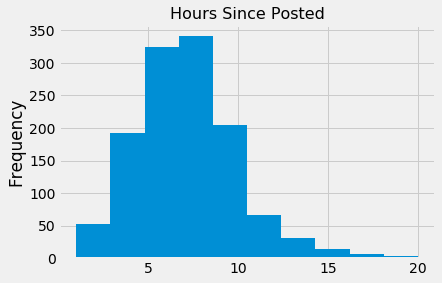

In [51]:
plt.style.use('fivethirtyeight')
#see how the distribution of "posted" looks
df.posted.plot(kind = 'hist').set_title('Hours Since Posted', fontsize=16)

Text(0,0.5,u'Frequency')

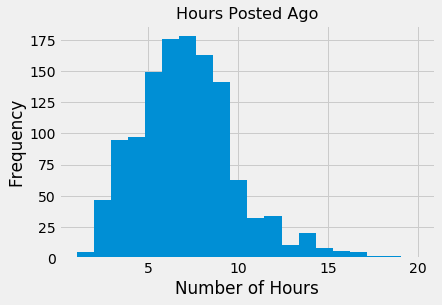

In [52]:
plt.style.use('fivethirtyeight')
# check # of bins, and add more formatting

df.posted.plot(kind = 'hist',bins=20).set_title('Hours Posted Ago', fontsize=16)
plt.xlabel('Number of Hours')
plt.ylabel('Frequency')

In [53]:
#show the most common subreddits [ please see aww, gaming, funny, pics, \
#todayilearned, worldnews, gifs]
subreddits =df.subreddit.value_counts(ascending = False)
subreddits

aww                    49
gaming                 37
funny                  32
pics                   28
todayilearned          27
worldnews              24
gifs                   22
BlackPeopleTwitter     19
news                   19
interestingasfuck      15
StarWars               15
sports                 15
Futurology             14
wholesomebpt           13
DadReflexes            13
instant_regret         13
oldpeoplefacebook      13
fakehistoryporn        13
GetMotivated           13
dataisbeautiful        13
FellowKids             13
ChoosingBeggars        12
baseball               12
evilbuildings          12
WeWantPlates           12
oddlysatisfying        12
standupshots           12
WWII                   10
FireEmblemHeroes       10
science                10
                       ..
apple                   1
NYKnicks                1
Music                   1
QuotesPorn              1
gamegrumps              1
dogpictures             1
memes                   1
SiliconValle

In [54]:
len(subreddits)

304

In [55]:
#top 20 subreddit threads
top25 = subreddits[:25]
top25

aww                   49
gaming                37
funny                 32
pics                  28
todayilearned         27
worldnews             24
gifs                  22
BlackPeopleTwitter    19
news                  19
interestingasfuck     15
StarWars              15
sports                15
Futurology            14
wholesomebpt          13
DadReflexes           13
instant_regret        13
oldpeoplefacebook     13
fakehistoryporn       13
GetMotivated          13
dataisbeautiful       13
FellowKids            13
ChoosingBeggars       12
baseball              12
evilbuildings         12
WeWantPlates          12
Name: subreddit, dtype: int64

In [56]:
#show the subreddits that only had one mention
only1 = df.subreddit.value_counts(ascending = True)[:66]
#there are 66 values with only one 
print len(only1)
print only1.head()

66
kpop             1
foxes            1
boardgames       1
astoria          1
Documentaries    1
Name: subreddit, dtype: int64


In [57]:
#those who only had two mentions
only2 = df.subreddit.value_counts(ascending = True)[67:136]
print len(only2)
print only2.head(10)

69
2meirl4meirl          2
books                 2
blackmagicfuckery     2
Whatcouldgowrong      2
MMA                   2
askscience            2
ilikthebred           2
WhitePeopleTwitter    2
PuppySmiles           2
blop                  2
Name: subreddit, dtype: int64


## A Chart showing the number of subreddits grouped by how often they were mentioned, to see what the ideal number of mentions is

In [58]:
counts = df.subreddit.value_counts(ascending = False)
counts

aww                    49
gaming                 37
funny                  32
pics                   28
todayilearned          27
worldnews              24
gifs                   22
BlackPeopleTwitter     19
news                   19
interestingasfuck      15
StarWars               15
sports                 15
Futurology             14
wholesomebpt           13
DadReflexes            13
instant_regret         13
oldpeoplefacebook      13
fakehistoryporn        13
GetMotivated           13
dataisbeautiful        13
FellowKids             13
ChoosingBeggars        12
baseball               12
evilbuildings          12
WeWantPlates           12
oddlysatisfying        12
standupshots           12
WWII                   10
FireEmblemHeroes       10
science                10
                       ..
apple                   1
NYKnicks                1
Music                   1
QuotesPorn              1
gamegrumps              1
dogpictures             1
memes                   1
SiliconValle

In [59]:
#look at the mean, min, max, etc.
counts.describe()

count    304.000000
mean       4.062500
std        5.416578
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       49.000000
Name: subreddit, dtype: float64

Text(0.5,0,u'Number of Appearances on Reddit')

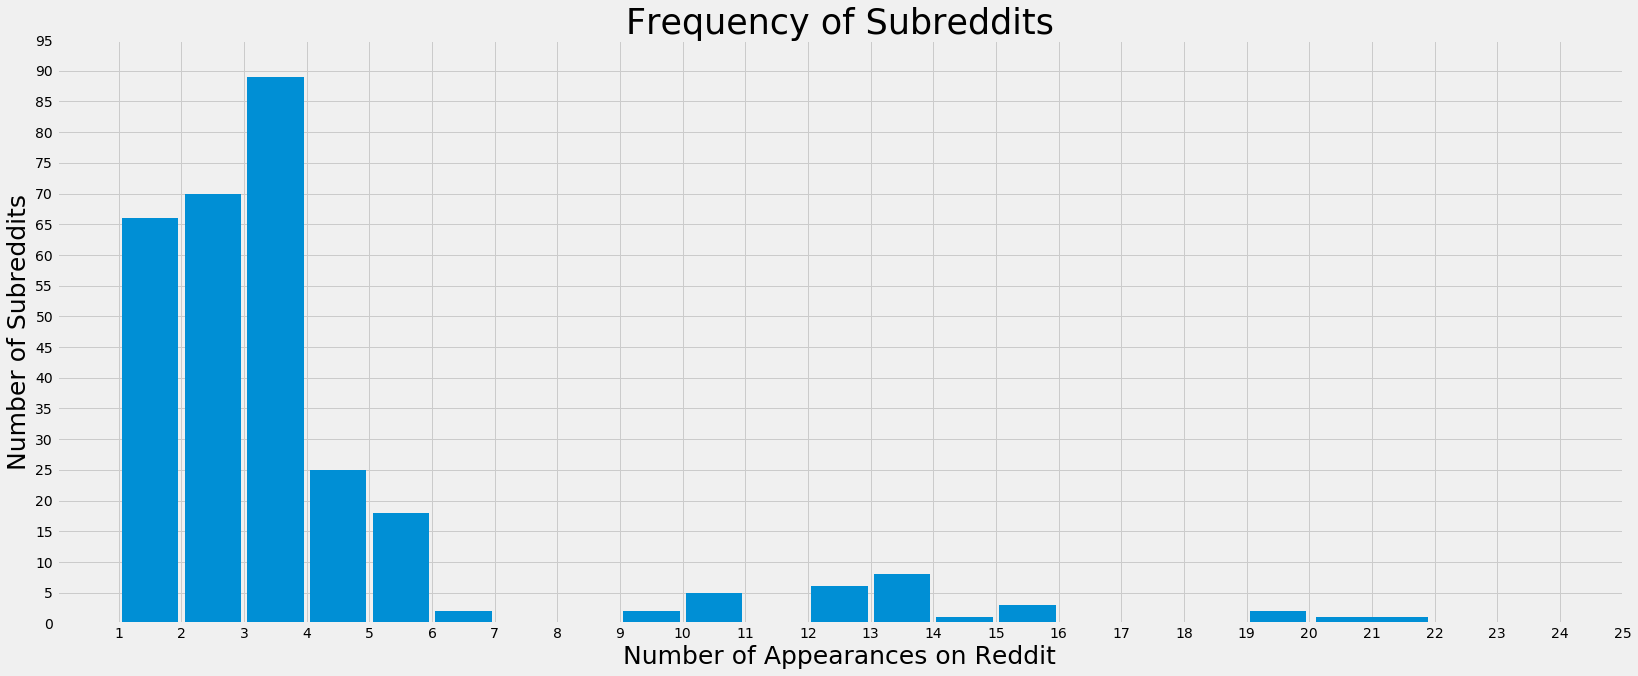

In [61]:
counts.hist(figsize = (25,10), bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22],\
            rwidth=0.9).set_title('Frequency of Subreddits', fontsize = 35)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.yticks(range(0,100,5))
plt.ylabel('Number of Subreddits', fontsize = 25)
plt.xlabel('Number of Appearances on Reddit', fontsize=25)

Text(0,0.5,u'Frequency')

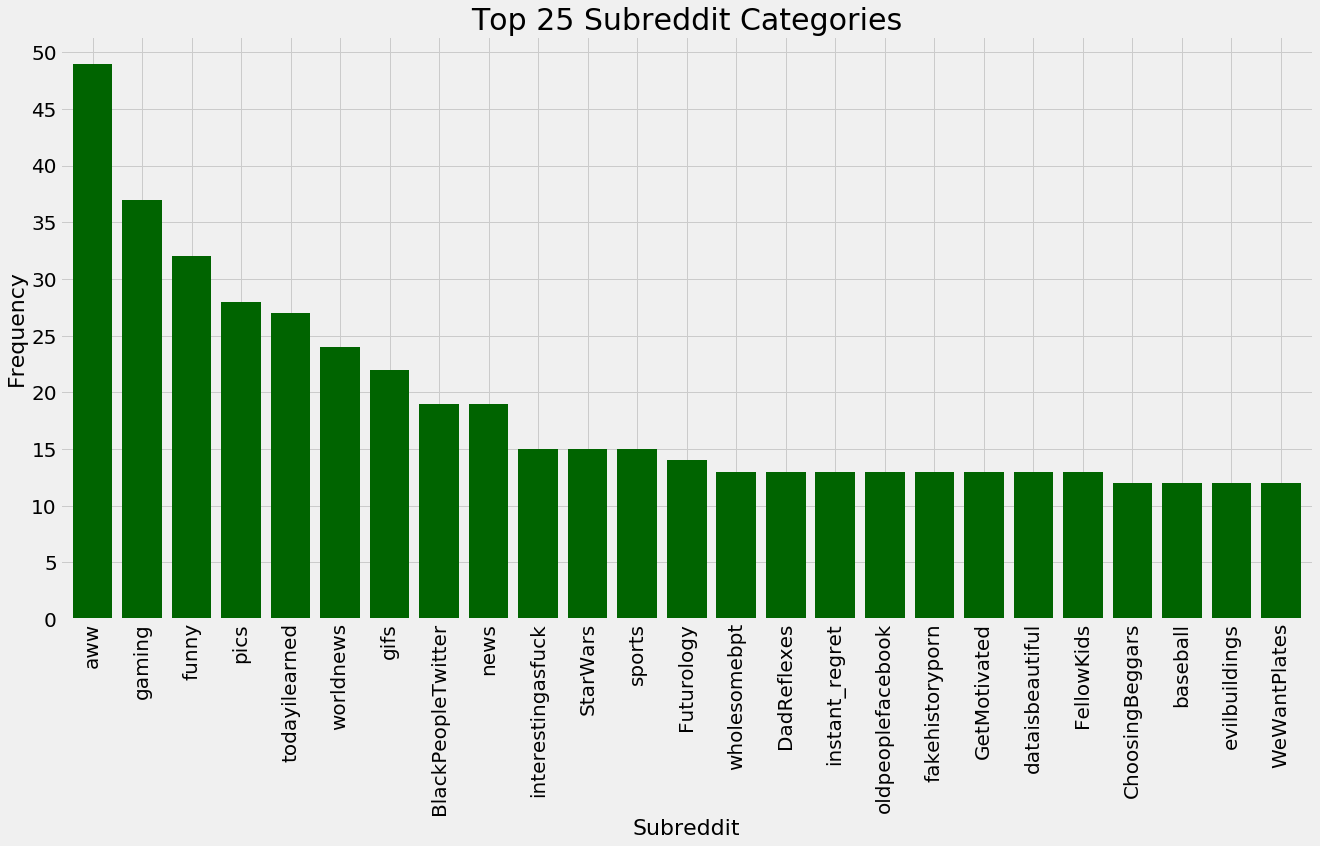

In [66]:
#look at the top 20 subreddits
top25.plot(kind='bar', figsize =(20,10), width = .8, color = 'darkgreen',fontsize = 20).set_title(\
        'Top 25 Subreddit Categories', fontsize=30)
plt.yticks(range(0,55,5))
plt.xlabel("Subreddit",fontsize=22)
plt.ylabel("Frequency",fontsize=22)

In [67]:
#group posts by subreddit to look further
groupy = df.groupby('subreddit').sum()
groupy

,comments,posted
subreddit,,
2healthbars,30,13
2meirl4meirl,557,29
4PanelCringe,105,18
ANormalDayInRussia,21,6
ATBGE,862,36
AbandonedPorn,1461,27
AccidentalRenaissance,46,5
Android,1904,19
AnimalCrossing,46,6


Text(0,0.5,u'Number of Comments')

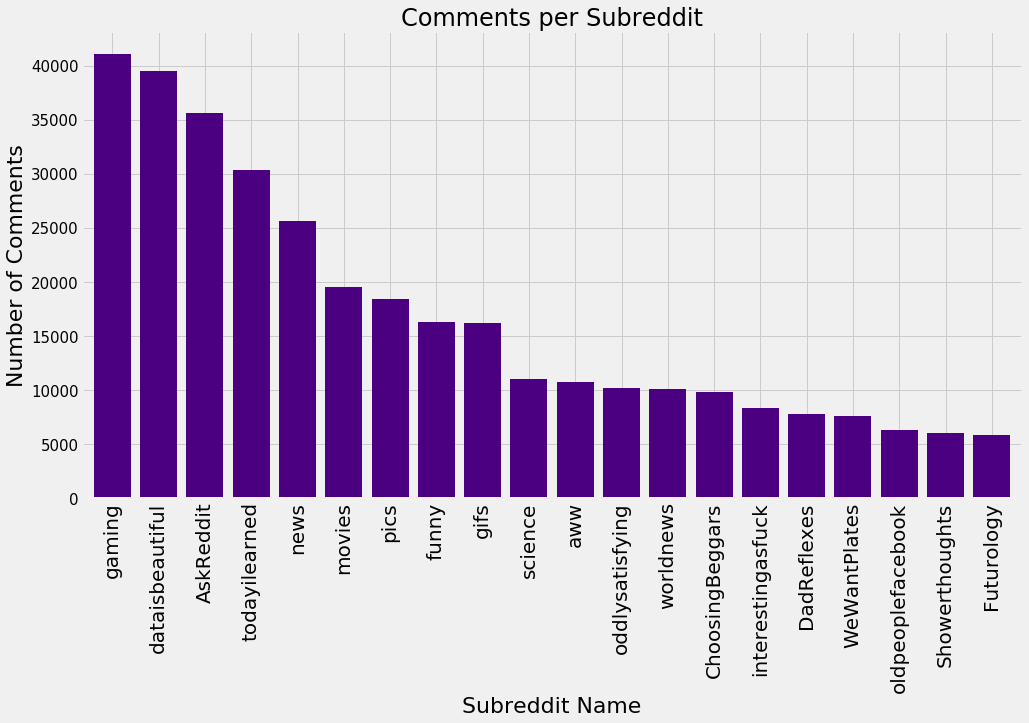

In [133]:
groupy.comments.sort_values(ascending = False).head(20).plot(kind='bar', fontsize = 12,figsize=(15,8),width=.8,color ='indigo').set_title(\
            'Comments per Subreddit', fontsize = 24)
plt.rc('ytick', labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Subreddit Name",fontsize=22)
plt.ylabel("Number of Comments",fontsize=22)

In [69]:
print("{} Mean: {} std(±) {}".format("Number Comments", float(np.mean(df.comments)), df.comments.std()))

Number Comments Mean: 418.419433198 std(±) 844.813757123


In [70]:
#there are many outliers, data is extremely skewed for comments

In [71]:
#comments grouped by subreddit, MUCH higher than average
groupy.comments.describe()

count      304.000000
mean      1699.828947
std       5039.036727
min          3.000000
25%         73.250000
50%        309.500000
75%        909.000000
max      41102.000000
Name: comments, dtype: float64

Text(0,0.5,u'Number of Comments')

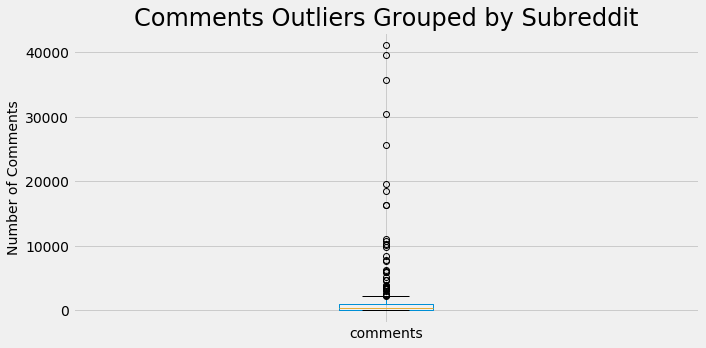

In [72]:
groupy.comments.plot(kind = 'box', figsize=(10,5),fontsize=14).set_title('Comments Outliers Grouped by Subreddit', fontsize = 24)
plt.ylabel('Number of Comments', fontsize = 14)

In [73]:
#comments not grouped
df.comments.describe()

count    1235.000000
mean      418.419433
std       844.813757
min         2.000000
25%        65.000000
50%       163.000000
75%       457.500000
max      9476.000000
Name: comments, dtype: float64

## Show dataframe comments and outliers

Text(0,0.5,u'Number of Comments')

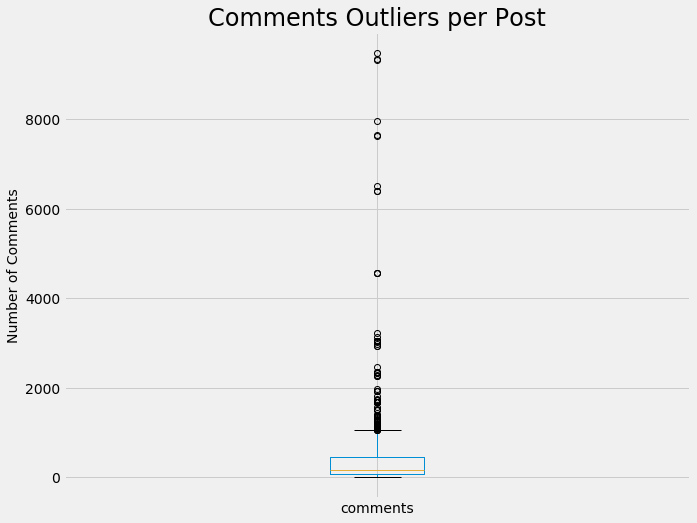

In [74]:
df.comments.plot(kind = 'box', figsize=(10,8),fontsize=14).set_title('Comments Outliers per Post', fontsize = 24)
plt.ylabel('Number of Comments', fontsize = 14)

## Show how many comments are posted vs. how long ago the thread was posted

In [98]:
times = df.groupby('posted').sum()
times = times.reset_index()

In [101]:
times.

SyntaxError: invalid syntax (<ipython-input-101-d70f57a95660>, line 1)

Text(0,0.5,u'Number of Comments')

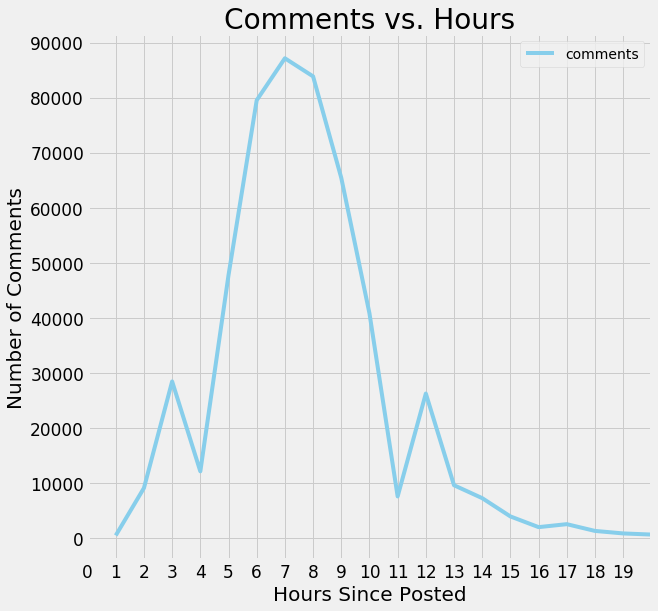

In [125]:
times.plot(kind='line', x='posted',y='comments', figsize=(9,9), fontsize = 17, color ='skyblue').set_title('Comments vs. Hours', fontsize = 28)
plt.xticks(range(0,20,1))
plt.yticks(range(0,100000,10000))

plt.xlabel('Hours Since Posted', fontsize = 20)
plt.ylabel('Number of Comments', fontsize = 20)

## Now turn "subreddits" and "titles" into numeric values using NLP, CountVectorizer

In [76]:
#creating new df to apply NLP to (and add to the end)
Xt = df.title

In [77]:
#import CountVectorizer to vectorize the titles
from sklearn.feature_extraction.text import CountVectorizer

# Note that there are several parameters to tweak.
cvec = CountVectorizer()
cvec.fit(Xt)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [78]:
#look at what the matrix looks like
cvec.transform(Xt).todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [79]:
X_t = pd.DataFrame(cvec.transform(Xt).todense(),
                 columns = cvec.get_feature_names())
print X_t.columns
len(X_t.columns)

Index([u'000', u'000th', u'05', u'06', u'10', u'100', u'1000', u'1012',
       u'1024', u'10th',
       ...
       u'yosemite', u'you', u'youngling', u'your', u'youre', u'youshouldknow',
       u'youtu', u'youtube', u'ysk', u'zaharoff'],
      dtype='object', length=2177)


2177

In [80]:
#note that the max features is ONLY 2177

In [81]:
#set up matrix with max 100 features
cvec100 = CountVectorizer(max_features = 100)
cvec100.fit(Xt)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [82]:
cvec_50 = CountVectorizer(max_features = 50,stop_words ='english')
cvec_50.fit(Xt)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=50, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [83]:
X50 = pd.DataFrame(cvec_50.transform(Xt).todense(),
                 columns = cvec_50.get_feature_names())
print len(X50.columns)
print X50.columns


50
Index([u'amazon', u'art', u'best', u'cat', u'com', u'crash', u'created',
       u'dad', u'day', u'didn', u'don', u'end', u'endless', u'existed', u'fan',
       u'finds', u'fun', u'girlfriend', u'got', u'hey', u'imgur', u'items',
       u'just', u'know', u'like', u'live', u'new', u'night', u'oc', u'old',
       u'photo', u'probably', u'redd', u'reddit', u'run', u'self', u'shop',
       u'space', u'special', u'til', u'time', u'today', u'told', u'unique',
       u've', u'war', u'way', u'weird', u'year', u'years'],
      dtype='object')


In [84]:
X100 = pd.DataFrame(cvec100.transform(Xt).todense(),
                 columns = cvec100.get_feature_names())
X100.columns

Index([u'all', u'amazon', u'an', u'and', u'are', u'art', u'as', u'at', u'be',
       u'best', u'by', u'cat', u'com', u'crash', u'created', u'dad', u'day',
       u'didn', u'don', u'during', u'end', u'endless', u'even', u'every',
       u'existed', u'fan', u'finds', u'first', u'for', u'found', u'from',
       u'full', u'fun', u'get', u'got', u'has', u'have', u'he', u'hey', u'his',
       u'how', u'imgur', u'in', u'into', u'is', u'it', u'items', u'just',
       u'know', u'like', u'made', u'me', u'my', u'new', u'night', u'not',
       u'oc', u'of', u'off', u'old', u'on', u'one', u'our', u'out',
       u'probably', u'redd', u'reddit', u'run', u'self', u'shop', u'so',
       u'some', u'space', u'special', u'that', u'the', u'then', u'they',
       u'this', u'til', u'time', u'to', u'today', u'told', u'two', u'unique',
       u've', u'war', u'was', u'way', u'we', u'weird', u'what', u'when',
       u'who', u'with', u'year', u'years', u'you', u'your'],
      dtype='object')

In [85]:
cvec_strip = CountVectorizer(min_df = 2, ngram_range=(1,2),strip_accents = 'unicode',stop_words='english')
cvec_strip.fit(Xt)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents='unicode', token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [135]:
Xstrip = pd.DataFrame(cvec_strip.transform(Xt).todense(),
                 columns = cvec_strip.get_feature_names())
print Xstrip.columns
len(Xstrip.columns)

 Index([u'000', u'000 dodge', u'000 socked', u'000 upvotes', u'000 votes',
       u'000 year', u'10', u'10 000', u'10 ogre', u'100',
       ...
       u'youngling', u'youngling trying', u'youre', u'youre hurting', u'youtu',
       u'youtube', u'youtube com', u'youtube tutorial', u'zaharoff',
       u'zaharoff sold'],
      dtype='object', length=2743)


2743

In [136]:
#try with the TFY-DIF, which weights unique variables to one post more
#still running NLP on the "titles'

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2,stop_words='english')
tfidf.fit(Xt)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [138]:
DF_TFI = pd.DataFrame(tfidf.transform(Xt).todense(),
                 columns = tfidf.get_feature_names())
print DF_TFI.columns
len(DF_TFI.columns)

Index([u'000', u'10', u'100', u'1000', u'1012', u'1024', u'11', u'13',
       u'1365x2048', u'144p',
       ...
       u'yesterday', u'yggbrosil', u'yoga', u'york', u'yosemite', u'youngling',
       u'youre', u'youtu', u'youtube', u'zaharoff'],
      dtype='object', length=1332)


1332

### Do NLP on Subreddits

In [139]:
Xs = df.subreddit

In [140]:
cvec = CountVectorizer()
cvec.fit(Xs)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [141]:
X_s_r = pd.DataFrame(cvec.transform(Xs).todense(),
                 columns = cvec.get_feature_names())
print len(X_s_r.columns)
print X_s_r.columns

304
Index([u'2healthbars', u'2meirl4meirl', u'4panelcringe', u'abandonedporn',
       u'absolutelynotme_irl', u'accidentalrenaissance', u'android',
       u'animalcrossing', u'animalsbeingderps', u'animalsbeingjerks',
       ...
       u'woof_irl', u'worldnews', u'writingprompts', u'wwii', u'xboxone',
       u'yesyesyesno', u'youseeingthisshit', u'youshouldknow', u'youtubehaiku',
       u'zelda'],
      dtype='object', length=304)


In [142]:
cvecs = CountVectorizer(max_features = 100)
cvecs.fit(Xs)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [143]:
subreddits = pd.DataFrame(cvecs.transform(Xs).todense(),
                 columns = cvecs.get_feature_names())
print len(subreddits.columns)
print subreddits.columns

100
Index([u'android', u'animalsbeingderps', u'askreddit', u'atbge', u'aww',
       u'babyelephantgifs', u'baseball', u'behindthegifs', u'bettereveryloop',
       u'blackpeoplegifs', u'blackpeopletwitter', u'bossfight',
       u'choosingbeggars', u'colorizedhistory', u'coolguides', u'dadreflexes',
       u'dankchristianmemes', u'dataisbeautiful', u'ddlc', u'disneyvacation',
       u'eagles', u'earthporn', u'educationalgifs', u'evilbuildings',
       u'facepalm', u'fakehistoryporn', u'fellowkids', u'fireemblemheroes',
       u'fortnitebr', u'funny', u'futurology', u'gaming', u'garlicoin',
       u'getmotivated', u'gifs', u'highqualitygifs', u'iasip',
       u'imaginarytechnology', u'indianpeoplefacebook', u'ineeeedit',
       u'insanepeoplefacebook', u'instant_regret', u'interestingasfuck',
       u'itookapicture', u'jokes', u'justrolledintotheshop',
       u'keanubeingawesome', u'kenm', u'latestagecapitalism', u'lego',
       u'libertarian', u'livestreamfail', u'lotr', u'mapporn',
    

In [144]:
cvec_st = CountVectorizer(strip_accents='unicode')
cvec_st.fit(Xs)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents='unicode', token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [145]:
sub_strip = pd.DataFrame(cvec_st.transform(Xs).todense(),
                 columns = cvec_st.get_feature_names())
print len(sub_strip.columns)
print sub_strip.columns

304
Index([u'2healthbars', u'2meirl4meirl', u'4panelcringe', u'abandonedporn',
       u'absolutelynotme_irl', u'accidentalrenaissance', u'android',
       u'animalcrossing', u'animalsbeingderps', u'animalsbeingjerks',
       ...
       u'woof_irl', u'worldnews', u'writingprompts', u'wwii', u'xboxone',
       u'yesyesyesno', u'youseeingthisshit', u'youshouldknow', u'youtubehaiku',
       u'zelda'],
      dtype='object', length=304)


In [146]:
#try a different NLP method of looking at the values
tfidf = TfidfVectorizer(min_df=2)
tfidf.fit(Xs)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [147]:
tfdfs = pd.DataFrame(tfidf.transform(Xt).todense(),
                      columns = tfidf.get_feature_names())
print len(tfdfs.columns)
print tfdfs.columns


238
Index([u'2healthbars', u'2meirl4meirl', u'4panelcringe', u'abandonedporn',
       u'android', u'animalsbeingderps', u'animalsbeingjerks', u'askreddit',
       u'askscience', u'atbge',
       ...
       u'whyweretheyfilming', u'woahdude', u'woof_irl', u'worldnews',
       u'writingprompts', u'wwii', u'xboxone', u'youseeingthisshit',
       u'youtubehaiku', u'zelda'],
      dtype='object', length=238)


## Now that we have models, look at our target (# of comments, representing level of engagement)

In [148]:
print "Median: ", np.median(df.comments)
print "Mean: ", np.mean(df.comments)

print
print "STD: ", np.std(df.comments)
#clearly shows that there are outliers

Median:  163.0
Mean:  418.419433198

STD:  844.471657997


In [149]:
#look at the target make up again
df.comments.describe()

count    1235.000000
mean      418.419433
std       844.813757
min         2.000000
25%        65.000000
50%       163.000000
75%       457.500000
max      9476.000000
Name: comments, dtype: float64

In [150]:
#use 75% to mark as high, plenty of data and includes those outliers and such.
#using 75% b/c it is so close to the mean that it better describes what qualifies as "high"

In [151]:
#use lambda function to reset comment numbers 
df.comments = df.comments.apply(lambda x: 1 if x >= 457 else 0)

In [152]:
df.comments.value_counts()

0    925
1    310
Name: comments, dtype: int64

In [153]:
#subset the most common of the two (x=0)
df.comments.value_counts()[0]

925

### Set Baseline for classification modeling

In [154]:
print "Baseline: ", (df.comments.value_counts()[0])/float(len(df.comments))*100,"%"

Baseline:  74.8987854251 %


#### Create a Random Forest model to predict High/Low number of comments using Sklearn. Start by ONLY using the subreddit as a feature.

In [ ]:
#already countvectorized and tfi-df on the subreddits
#marked as countvectorizer = subreddits and TF-IDF = tfdfs

In [ ]:
subreddits.shape

In [ ]:
tfdfs.shape

## Run Random Forest Classification Model & KNN on Subreddits & Titles

In [ ]:
#import RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
#import 

### Four different subreddits:
- X_s_r: no feature manipulation
- Xs: max 100 features
- X_sub = strip accents

In [ ]:
X_s_r = X_s_r #no features
X100 = subreddits #max 100
X_sub = sub_strip #stripaccents
Xts = tfdfs #tfi-df

y = df.comments

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv = StratifiedKFold(n_splits = 5, random_state=42, shuffle=True)

In [ ]:
#show cross_val_score for subreddits (cvec w/no feature manipulation)
print cross_val_score(rf,X_s_r,y,cv=cv)
print "Mean: ", cross_val_score(rf,X_s_r,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X_s_r,y,cv=cv).std()

In [ ]:
#show cross_val_score for subreddits (cvec with max 100 features)
print cross_val_score(rf,X100,y,cv=cv)
print "Mean: ", cross_val_score(rf,X100,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X100,y,cv=cv).std()

In [ ]:
#show cross_val_score for tfdfs (TF-IDF)
print cross_val_score(rf,Xts,y,cv=cv)
print "Mean: ", cross_val_score(rf,Xts,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,Xts,y,cv=cv).std()

In [ ]:
#show cross_val_score for subreddits (cvec with strip accents)
print "RandomForest X_sub: "
print cross_val_score(rf,X_sub,y,cv=cv)
print "Mean: ", cross_val_score(rf,X_sub,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X_sub,y,cv=cv).std()

# Run RandomForest on Titles

The different titles that I made above were:
- X_t - no feature manipulation
- X50 - max 50 features
- X100 - max 100 features
- Xstrip - min_df=2, ngram=(1,2), strip_accents, stopwords='english'
- DF_TFI

In [ ]:
#show cross_val_score for plain CVEC, no feature manipulation
print "RandomForestClassifier: "
print cross_val_score(rf,X_t,y,cv=cv)
print "Mean: ", cross_val_score(rf,X_t,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X_t,y,cv=cv).std()

In [ ]:
#show cross_val_score for CVEC with 50 max, stop_words
print "RandomForest: "
print cross_val_score(rf,X50,y,cv=cv)
print "Mean: ", cross_val_score(rf,X50,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X50,y,cv=cv).std()

In [ ]:
#try KNN
#show cross_val_score for CVEC with 50 max, stop_words
print "KNearestNeighbors: "
print cross_val_score(rf,X50,y,cv=cv)
print "Mean: ", cross_val_score(rf,X50,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X50,y,cv=cv).std()

In [ ]:
#show cross_val_score for CVEC with 100 max, no stop_words or other features
print cross_val_score(rf,X50,y,cv=cv)
print "Mean: ", cross_val_score(rf,X50,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,X50,y,cv=cv).std()

In [ ]:
#show cross_val_score for CVEC with no max, english stop_words, stripaccents
#min_df=2, and ngram(1,2)
print cross_val_score(rf,Xstrip,y,cv=cv)
print "Mean: ", cross_val_score(rf,Xstrip,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,Xstrip,y,cv=cv).std()

In [ ]:
#show cross_val_score for TFDF with no additional feature manipulation
print cross_val_score(rf,DF_TFI,y,cv=cv)
print "Mean: ", cross_val_score(rf,DF_TFI,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf,DF_TFI,y,cv=cv).std()

#### Best CountVectorizer for titles were CVEC with no manipulation and CVEC with max features 50 and english stopwords, but nowhere close to subreddits, continuing with subreddits only

In [ ]:
## Run KNN on best two

### Best Scores (both Subreddits):
**BEST**: 
- CVEC with strip_accents (X_sub)
- CVEC with no manipulation (X_s_r) 


In [ ]:
X_s_r.shape

In [ ]:
X_sub.shape

In [ ]:
sub_strip.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [ ]:
#show cross_val_score for subreddits (cvec w/no feature manipulation) on KNN
print cross_val_score(knn,X_s_r,y,cv=10)
print "Mean: ", cross_val_score(knn,X_s_r,y,cv=10).mean()*100, '%'
print "STD: ", cross_val_score(knn,X_s_r,y,cv=10).std()

In [ ]:
#show cross_val_score for subreddits (cvec w/no feature manipulation) on KNN
print cross_val_score(knn,X_sub,y,cv=10)
print "Mean: ", cross_val_score(knn,X_sub,y,cv=10).mean()*100, '%'
print "STD: ", cross_val_score(knn,X_sub,y,cv=10).std()

In [ ]:
#show cross_val_score for subreddits (cvec with strip accents) on KNN
print cross_val_score(knn,X100,y,cv=cv)
print "Mean: ", cross_val_score(knn,X100,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(knn,X100,y,cv=cv).std()

In [ ]:
#knn ran similarly, so will run gridsearch on both

# Run GridSearchCV for RF on X_s_r and X_sub (top performing model and predictors)

In [ ]:
 paramsrf = {
    'n_estimators':range(5,15), 
     'max_depth': [15,30,50,None], 
     'min_samples_split': [5,6,7,8,9]}
grid_rf = GridSearchCV(rf, verbose=1,cv=cv,param_grid=paramsrf)

In [ ]:
#fit against X_s_r
grid_rf.fit(X_s_r,y)

In [ ]:
print grid_rf.best_score_
print grid_rf.best_params_

In [ ]:
rf_subreddits = RandomForestClassifier(min_samples_split=6, n_estimators=11)

In [ ]:
print "Best Performing RandomForest for Subreddits"
print cross_val_score(rf_subreddits,X_s_r,y,cv=cv)
print "Mean: ", cross_val_score(rf_subreddits,X_s_r,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf_subreddits,X_s_r,y,cv=cv).std()

In [ ]:
#trying Randomized Grid Search for the knn
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
    'n_neighbors':range(1,300),
    'weights':['uniform','distance']}
rand_knn = RandomizedSearchCV(knn, params, n_iter=20,verbose=1,cv=cv)

In [ ]:
rand_knn.fit(X_s_r,y)

In [ ]:
print rand_knn.best_score_
print rand_knn.best_params_

In [ ]:
knn_optimized = KNeighborsClassifier(n_neighbors=95,weights='distance')

In [ ]:
print "Best Performing KNearestNeighbors for Subreddits"
print cross_val_score(knn_optimized,X_s_r,y,cv=cv)
print "Mean: ", cross_val_score(knn_optimized,X_s_r,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(knn_optimized,X_s_r,y,cv=cv).std()

In [ ]:
#fit against X_sub
grid_rf.fit(X_sub,y)

In [ ]:
print grid_rf.best_score_
print grid_rf.best_params_

In [ ]:
 paramsrf = {
    'n_estimators':range(1,50), 
     'max_depth': [15,30,40,50,60,70,90,100,110,12,130,150,None], 
     'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

rand_rf = RandomizedSearchCV(rf,paramsrf, n_iter=15, verbose=1,cv=cv)

In [ ]:
rand_rf.fit(X_sub,y)

In [ ]:
print rand_rf.best_score_
print rand_rf.best_params_

In [ ]:
rf_stripacc = RandomForestClassifier(min_samples_split=6,n_estimators=35, max_depth=110)

In [ ]:
print "Second Best Performing RandomForest for Subreddits"
print cross_val_score(rf_stripacc,X_sub,y,cv=cv)
print "Mean: ", cross_val_score(rf_stripacc,X_sub,y,cv=cv).mean()*100, '%'
print "STD: ", cross_val_score(rf_stripacc,X_sub,y,cv=cv).std()

# Conclusions on the Data

### 1. The best indicator of high comments (and high engagement) was subreddit
### 2. Conducting a CrossVectorizer on the subreddits was incredibly useful, specifically when no features were added, and when the accents were stripped (strip_accents = 'unicode')
### 3. RandomForest was the best model to predict engagement
- ####      running a GridSearch allowed us to slightly optimize the model, but generally the features of the model did not have a large effect on the score


# Conclusions for Engagement

## Engagement (as measured by number of comments) was most strongly correlated with subreddits. As seen in the graphs below, most subreddits in the "hot thread" were mentioned 4 or less times (4 was the median, 6 was the 75th percentile). This indicates that while most subreddits do not appear often, posts within high-use subreddits will have a much better chance of high engagement

In [ ]:
counts.hist(figsize = (25,10), bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22],\
            rwidth=0.9).set_title('Frequency of Subreddits', fontsize = 35)
plt.rc('xtick', labelsize=23) 
plt.rc('ytick', labelsize=23)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.yticks(range(0,100,5))
plt.ylabel('Number of Subreddits', fontsize = 30)
plt.xlabel('Number of Appearances on Reddit', fontsize=30)

In [ ]:
#now lets look at just how many comments were on these "high profile" subreddits

In [ ]:
groupy.comments.sort_values(ascending = False).head(25)

In [ ]:
groupy.comments.sort_values(ascending = False).head(25).plot(kind='bar', fontsize = 12,figsize=(20,15)).set_title(\
            'Comments per Subreddit', fontsize = 34)
plt.rc('ytick', labelsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Subreddit Name",fontsize=28)
plt.ylabel("Number of Comments",fontsize=28)

Text(0,0.5,u'Frequency')

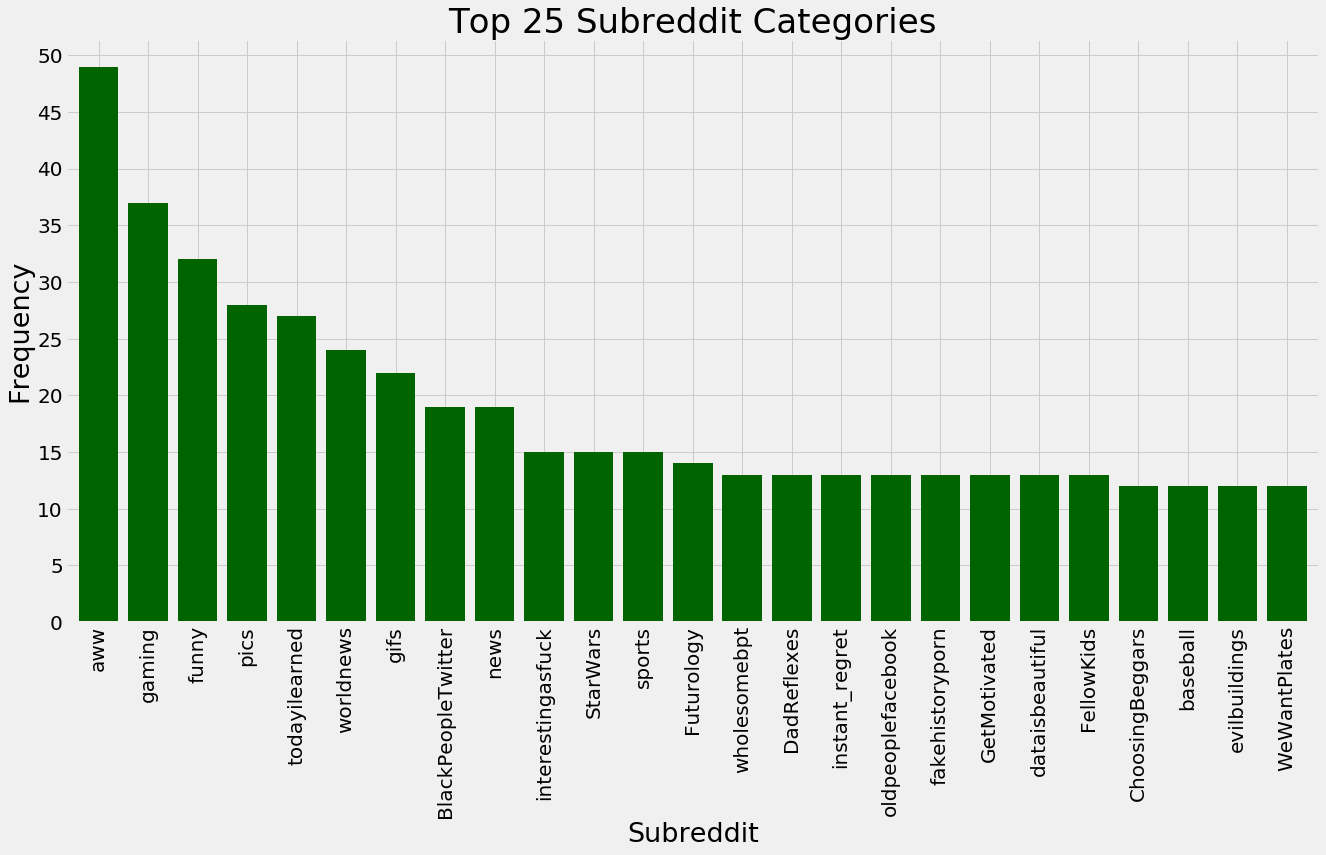

In [65]:
#look at the top 20 subreddits
top25.plot(kind='bar', figsize =(20,10), width = .8, color = 'darkgreen',fontsize = 20).set_title(\
        'Top 25 Subreddit Categories', fontsize=34)
plt.yticks(range(0,55,5))
plt.xlabel("Subreddit",fontsize=27)
plt.ylabel("Frequency",fontsize=27)

In [64]:
#top 20 most often subreddits to appear in hot threatd
top25.index

Index([u'aww', u'gaming', u'funny', u'pics', u'todayilearned', u'worldnews',
       u'gifs', u'BlackPeopleTwitter', u'news', u'interestingasfuck',
       u'StarWars', u'sports', u'Futurology', u'wholesomebpt', u'DadReflexes',
       u'instant_regret', u'oldpeoplefacebook', u'fakehistoryporn',
       u'GetMotivated', u'dataisbeautiful', u'FellowKids', u'ChoosingBeggars',
       u'baseball', u'evilbuildings', u'WeWantPlates'],
      dtype='object')

In [ ]:
#top 20 most commented on threads
groupy.comments.sort_values(ascending = False).head(20).index

As shown above, threads such as gaming and dataisbeautiful have an immense number of comments, and both of those are in the top20 most posted. 

##crossover for 13/20 top posts

# Executive Summary:



FiveThirtyEight is a website whose job is to run statistical analyses and apply them to the news.  Users are predominately well-educated and work in technology, and look forward to seeing the statistical analyses. When they go on FiveThirtyEight, they look for accurate quantitative analyses of the most recent news topics, and they expect them fast. 

As a growing company, and in order to maximize profits and efficiency, it's important that when you post on social media, you know for sure that those posts will have the desired effect. Because of this, efficiency is not only important for company functionality, but also to correspond with company credo. Reddit is a very active place for technologically inclined users to interact with each other and learn about current events. Therefore, Reddit is an ideal place for FiveThirtyEight to engage with your consumer base.

In order to make the most of your Reddit posts, you'll need to understand how to effectively reach your potential clients. Reddit posts have many components to measure how well users are engaging with your content, and one of the most important features is the number of comments attached to a post. With comments, you can clearly see how people are engaging with the post, be it positively, negatively or neutrally. In order to figure out what the highest engagement posts could be, I looked at how to maximize the number of comments for a post. I looked at different aspects of each post, and found that the subreddit title was an great measure of how many comments one could expect on a post. According to my analysis, posting your content in the most commonly used subreddit threads will have a significant impact on the number of comments. 

Luckily for FiveThirtyEight, the number of times a subreddit has to be mentioned in order to reap the most bang for your buck is only 4-6 posts. To apply this finding, all you have to do is find the subreddit that is the most popular, post your content within the subreddit and greatly increase your chances of engagement. According to data gathered from the current Reddit pages, approximately 7 out of 10 of the posts that had the highest number of comments were also pages that had the highest number of subreddit mentions. That is to say, number of appearances of a subreddit and number of comments are very strongly correlated.

If you want to make sure that FiveThirtyEight is reaching the highest amount of potential regular users, you need an analyst dedicated to analyzing the highest return on investment for each social media post. The analysis I present today shows only a basic overview of the types of analyses I can, and will, conduct to find the ultimate place, time, and content to post. 

In the age of Trump, where every day there are an abundance of controversial political issues, allow a fellow statistics-lover to analyze your social media presence so you can focus on what's important.  
